# 초보자를 위한 빠른 시작

In [ ]:
!pip install -q tensorflow-gpu==2.0.0-rc1
import tensorflow as tf

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 501kB 49.6MB/s 
     |████████████████████████████████| 4.3MB 47.5MB/s 


# 9주차 데이터 학습 모델 설계

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# import 
import os
import pandas as pd 
import glob

In [5]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks/') # DataPath 설정 
current_path = os.getcwd() # 현재 폴더 위치 
train_path = current_path+ '/capstone_data/train' # 데이터 패스 설정 
print(train_path)

/content/gdrive/My Drive/Colab Notebooks/capstone_data/train


In [6]:
df = pd.read_json('./capstone_data/data_version_2.json')

In [ ]:
df

,tags,id,plylst_title,songs,like_cnt,updt_date,len,tag_len,songs2,song2_len
1,"[까페, 잔잔한]",76951,"편하게, 잔잔하게 들을 수 있는 곡.-","[83116, 276692, 166267, 186301, 354465, 256598...",17,2017-08-28 07:09:34.000,28,2,"[83116, 276692, 166267, 354465, 256598, 666852...",25
2,"[운동, 드라이브, Pop, 트로피컬하우스, 힐링, 기분전환, 2017, 팝, 트렌...",69252,2017 Pop Trend,"[418694, 222305, 96545, 135950, 304687, 457451...",435,2017-09-15 15:59:26.000,30,10,"[418694, 222305, 96545, 135950, 304687, 457451...",22
3,"[잔잔한, 추억, 회상]",36557,멍청이.. 내맘도 몰라.,"[496913, 632529, 501426, 515574, 411161, 10341...",5,2008-09-23 22:32:02.000,20,3,"[632529, 501426, 515574, 411161, 103411, 17813...",17
5,"[우울, 힐링, 힘내]",112060,지친 너를 위로해줄 제목편지 준비해봤어,"[449808, 691770, 640657, 313395, 697100, 34090...",1,2018-01-04 22:49:29.000,21,3,"[691770, 640657, 313395, 697100, 340905, 22169...",15
6,[비오는날],75342,"이렇게 비 내리는 날이면, 너도 내 생각 할까..","[379674, 164522, 33196, 281228, 640012, 117969...",17,2016-10-12 16:22:17.000,18,1,"[164522, 33196, 640012, 117969, 75425, 627363,...",15
...,...,...,...,...,...,...,...,...,...,...
45430,"[겨울, 설렘, 사랑]",133185,첫눈처럼 설레였던 그날♥,"[334564, 221618, 504089, 321512, 476845, 11368...",154,2014-12-24 14:25:23.000,25,3,"[334564, 221618, 476845, 113687, 211159, 51275...",21
45434,[팝],33486,들을수록 걸크러쉬 물씬 느껴지는 음악리스트,"[619719, 374517, 323561, 79157, 170970, 241952...",4,2017-03-18 00:07:08.000,29,1,"[619719, 374517, 323561, 79157, 241952, 587512...",17
45435,[인디],153220,오후의 어쿠스틱 vol.2,"[627005, 253230, 643932, 22659, 316149, 247137...",39,2013-04-19 01:36:45.000,21,1,"[627005, 253230, 643932, 22659, 316149, 247137...",20
45436,[여친],79538,여자친구 명곡,"[65053, 389127, 443914, 498028, 375431, 312296...",6,2018-03-09 14:24:37.000,23,1,"[65053, 389127, 443914, 498028, 375431, 312296...",23


In [ ]:
df.shape

(29354, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29354 entries, 1 to 45437
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tags          29354 non-null  object
 1   id            29354 non-null  int64 
 2   plylst_title  29354 non-null  object
 3   songs         29354 non-null  object
 4   like_cnt      29354 non-null  int64 
 5   updt_date     29354 non-null  object
 6   len           29354 non-null  int64 
 7   tag_len       29354 non-null  int64 
 8   songs2        29354 non-null  object
 9   song2_len     29354 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 2.5+ MB


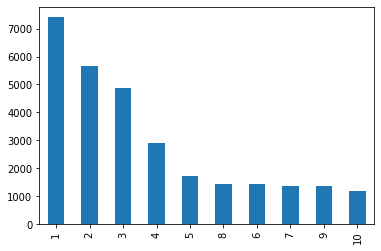

In [ ]:
df.tags.map(lambda x: len(x)).value_counts().plot.bar()

In [ ]:
df['songs2'].unique

<bound method Series.unique of 1        [83116, 276692, 166267, 354465, 256598, 666852...
2        [418694, 222305, 96545, 135950, 304687, 457451...
3        [632529, 501426, 515574, 411161, 103411, 17813...
5        [691770, 640657, 313395, 697100, 340905, 22169...
6        [164522, 33196, 640012, 117969, 75425, 627363,...
                               ...                        
45430    [334564, 221618, 476845, 113687, 211159, 51275...
45434    [619719, 374517, 323561, 79157, 241952, 587512...
45435    [627005, 253230, 643932, 22659, 316149, 247137...
45436    [65053, 389127, 443914, 498028, 375431, 312296...
45437    [287003, 408232, 625933, 543298, 222713, 10445...
Name: songs2, Length: 29354, dtype: object>

In [ ]:
# 태그 개수 세기

tag_cnt=set()
for i in df['tags']:
    for j in i:
        tag_cnt.add(j)

In [ ]:
type(tag_cnt)

set

In [ ]:
tag_cnt # 전체 태그

In [ ]:
len(tag_cnt) # 전체 태그 개수

1382

In [ ]:
# 음원 개수 세기

song_cnt=set()
for i in df['songs2']:
    for j in i:
        song_cnt.add(j)

In [ ]:
song_cnt

In [ ]:
len(song_cnt)

69888

# Latent Factor CF

In [1]:
# [Tag x Song] Pivot Table 생성

In [7]:
unique_tags = list(set([tag for tags in df.tags for tag in tags]))
unique_songs = list(set([song for songs in df.songs2 for song in songs]))

In [8]:
df_pivot = pd.DataFrame(index=unique_tags, columns=unique_songs)

In [ ]:
df_pivot = df_pivot.fillna(0)

In [ ]:
for i, (tags, songs) in enumerate(zip(df.tags, df.songs2)):
    print(i) if i % 100 == 0 else ''
    df_pivot.loc[tags, songs] += 1

In [9]:
# pivot table 불러오기
df_pivot = pd.read_pickle('./capstone_data/pivot_songs_tags.pickle')

In [10]:
df_pivot

,262145,393217,393222,10,524300,393232,524305,262164,262170,655386,262171,28,262174,30,32,655402,524331,393260,131117,262189,47,262192,655409,393266,131119,524340,54,655414,393273,262202,131131,393276,393277,62,262206,393280,524349,655426,67,524356,...,393139,524213,130998,524215,130997,131001,524217,262074,655292,524221,262081,524229,393158,131015,655305,524234,131019,393164,655308,262094,655309,262090,524245,655317,131030,393177,524251,393184,262114,262119,524265,131049,262125,262126,131057,262130,262138,262140,262142,131071
침대,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
로우파이,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
해외힙합,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
눈,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
감성적,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
싱그러운,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
자연,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
좋아요,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
베스트,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Matrix Factorization
from sklearn.decomposition import TruncatedSVD

SVD = TruncatedSVD(n_components=12)
matrix = SVD.fit_transform(df_pivot)
matrix.shape

(1382, 12)

In [12]:
# 피어슨 상관계수 구하기
import numpy as np

In [13]:
corr = np.corrcoef(matrix)
corr.shape

(1382, 1382)

In [ ]:
# heatmap 으로 표현
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.figure(figsize=(100,100))
sns.heatmap(corr,annot=True,fmt='.1g')

In [14]:
song_title = df_pivot.columns
song_title_list = list(song_title)
tag_title = df_pivot.index
tag_title_list = list(tag_title)
seed_tag = tag_title_list.index("카페")

In [15]:
corr_seed_tag = corr[seed_tag]
list(tag_title[corr_seed_tag >= 0.9])[:50]

['커피숍', '카페', '커피한잔', '매장', '나만알고싶은노래', '커피']

# LightGBM

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df['tags']
y = df ['songs2']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values,test_size=0.2, random_state=42)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
# lightGBM 데이터 모델 학습 

from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score

model_tags = LGBMRegressor(n_estimators=500);
model_tags.fit(X_train,y_train)
songs_pred = model_convention.predict(X_test)
y_test = np.expm1(y_test)
songs_pred = np.expm1(songs_pred)


ValueError: ignored